# Speech Topic Analysis
This notebook creates a sparse matrix of speech word data using TFIDF. NMF is used to cluster words into distinct topics. Topics during major war years are explored and "war-heaviness" metrics of speeches from different speakers are compared. The clustered topics are then plotted using t-SNE.

In [105]:
import pandas as pd
import numpy as np

In [106]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Load speech file

In [107]:
# load data from pickle file
import pickle

pickle_in = open("data/speeches.pickle", "rb")
speech_df = pickle.load(pickle_in)

In [108]:
speech_df.head()

,type,speaker,date,speech
1789 inauguration George Washington,inauguration,George Washington,1789,Fellow-Citizens of the Senate and of the House...
1790 state_union George Washington,state_union,George Washington,1790,I embrace with great satisfaction the opportun...
1790 state_union George Washington,state_union,George Washington,1790,In meeting you again I feel much satisfaction ...
1791 state_union George Washington,state_union,George Washington,1791,I meet you upon the present occasion with the ...
1792 state_union George Washington,state_union,George Washington,1792,It is some abatement of the satisfaction with ...


In [109]:
speech_text = speech_df['speech']

## TFIDF and NMF

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [111]:
t_vectorizer = TfidfVectorizer(
    stop_words="english",
    token_pattern="\\b[a-z][a-z]+\\b",
    max_df=0.9,
    min_df=0.05
)

# fit TFIDF on list of all speech text
t_vectorizer.fit(speech_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [112]:
# transform vectorizer on list of all speech text
# output is TFIDF matrix of # docs x # word-features

t_counts = t_vectorizer.transform(speech_text)
t_counts.shape

(356, 5573)

In [113]:
from sklearn import decomposition

In [114]:
n_topics = 20

nmf = decomposition.NMF(
    n_components=n_topics,
    max_iter=5,
    random_state=0
)

# fit NMF model on TFIDF matrix
nmf.fit(t_counts)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=5,
  n_components=20, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

## Topics
Retrieve topic list and top words from model

In [115]:
# define function to list each topic and its top words

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [116]:
print_top_words(nmf, t_vectorizer.get_feature_names(), 10)

Topic #0: congress year department general report secretary subject service attention law
Topic #1: america americans tonight let jobs work years world children today
Topic #2: world economic program federal congress programs farm year development defense
Topic #3: world freedom men free democracy life know man today let
Topic #4: public commerce citizens spain vessels session militia congress effect necessary
Topic #5: business law public interstate ought conditions work tariff necessary corporations
Topic #6: applause ve america let budget tonight congress iraq laughter year
Topic #7: constitution union shall public citizens congress state powers laws constitutional
Topic #8: party republican platform democratic convention nomination president say campaign republicans
Topic #9: ve ll soviet don jobs oil world know energy didn
Topic #10: banks year public treasury cent recovery federal fiscal silver expenditures
Topic #11: mexico texas treaty mexican congress territory minister treasu

Define topics

Topic #0: gov admin  
congress year department general report secretary subject service attention law

Topic #1: domestic employment  
america americans tonight let jobs work years world children today

Topic #2: national investment  
world economic program federal congress programs farm year development defense

Topic #3: freedom  
world freedom men free democracy life know man today let

Topic #4: noise  
public commerce citizens spain vessels session militia congress effect necessary

Topic #5: business  
business law public interstate ought conditions work tariff necessary corporations

Topic #6: noise  
applause ve america let budget tonight congress iraq laughter year

Topic #7: federal power  
constitution union shall public citizens congress state powers laws constitutional

Topic #8: campaign  
party republican platform democratic convention nomination president say campaign republicans

Topic #9: noise  
ve ll soviet don jobs oil world know energy didn

Topic #10: monetary  
banks year public treasury cent recovery federal fiscal silver expenditures

Topic #11: southwest territory  
mexico texas treaty mexican congress territory minister treasury spain act

Topic #12: gov budget  
year budget billion help congress children health percent tax medicare

Topic #13: war on terror  
iraq america terrorists terror freedom terrorist afghanistan world americans weapons

Topic #14: noise  
public bank general subject notes currency paper treasury indians objects

Topic #15: need to act  
shall america oath world fighting president men office learned win

Topic #16: warfare  
enemy british savages japanese prisoners fighting victory britain ships production

Topic #17: monetary  
gold tariff spain silver cuba products notes trade currency revenues

Topic #18: energy policy  
energy programs president oil federal strategic percent spending congress years

Topic #19: commitment  
vietnam tonight congress think years year commitments billion believe americans

In [117]:
# save document/topic matrix to dataframe
df_topics = pd.DataFrame(nmf.transform(t_counts))

### export matrix to pickle file as checkpoint
pickle_out = open("data/topics.pickle", "wb")
pickle.dump(df_topics, pickle_out)
pickle_out.close()

In [118]:
df_topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00000,0.0,0.000000,0.026181,0.092877,0.046217,0.000000,0.114305,0.008438,0.0,0.0,0.0,0.0,0.0,0.061394,0.038043,0.0,0.0,0.000000,0.000000
1,0.00000,0.0,0.000000,0.000000,0.100524,0.040468,0.000000,0.042391,0.000000,0.0,0.0,0.0,0.0,0.0,0.278857,0.008777,0.0,0.0,0.000000,0.000000
2,0.00000,0.0,0.001945,0.000000,0.201594,0.010442,0.001548,0.000000,0.004853,0.0,0.0,0.0,0.0,0.0,0.150883,0.018846,0.0,0.0,0.004716,0.005875
3,0.00000,0.0,0.000000,0.000000,0.142762,0.047833,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.327293,0.005919,0.0,0.0,0.000000,0.000000
4,0.03089,0.0,0.000000,0.000000,0.119821,0.009275,0.000000,0.002403,0.000000,0.0,0.0,0.0,0.0,0.0,0.268439,0.017327,0.0,0.0,0.000000,0.000000


In [119]:
# calculate topic percentages per document

df_topics_norm = df_topics.div(df_topics.sum(axis=1), axis=0)

In [120]:
df_topics_norm.loc[0, :][df_topics_norm.loc[0, :] > 0.15]

4     0.239709
7     0.295016
14    0.158455
Name: 0, dtype: float64

In [121]:
rand_var = nmf.transform(t_counts)

In [122]:
rand_var[3]

array([0.        , 0.        , 0.        , 0.        , 0.14276194,
       0.04783332, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32729338,
       0.00591933, 0.        , 0.        , 0.        , 0.        ])

In [123]:
# greatest topic per document
np.argmax(rand_var, axis=1)

array([ 7, 14,  4, 14, 14,  4, 15,  4,  4,  4,  7,  4,  7,  4,  4,  4,  7,
        4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  4, 16, 16, 16, 14,
        4,  4,  4,  4, 11,  4,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4, 14,
        7, 14,  4, 14,  7,  4, 14, 14, 14,  7, 14, 14, 14, 14, 14,  7, 14,
       14, 11, 11, 11,  7, 11, 11, 11, 11,  7, 11, 11, 11,  7,  7, 11, 11,
        7,  7, 11, 11, 11,  7,  0,  7,  0,  0,  8,  0, 15,  7,  7,  7, 10,
        0,  7,  0,  0,  0,  0,  7,  0,  0,  0,  7,  0,  0,  0,  0,  7,  0,
        7,  0,  0,  0,  0,  7,  0, 10, 17,  0,  7,  0, 17, 17, 17, 17,  0,
        5, 10, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5,  0,  5,  3,  5,
        5,  5,  5,  5,  5,  0,  0,  5,  0,  3,  5,  3,  3,  5,  5,  5, 15,
        3, 15,  5, 10,  3,  5,  3,  5,  5,  5,  5,  5,  5,  5,  5,  2,  8,
        2,  5, 10, 10, 10,  8,  8, 10,  3, 10,  2,  3,  3,  3,  3,  2,  2,
        3,  3,  8,  3,  3, 16, 16, 15, 15, 15, 16, 15,  2,  2,  3,  8,  2,
        3,  2,  2,  2,  2

In [124]:
import matplotlib.patches as mpatches

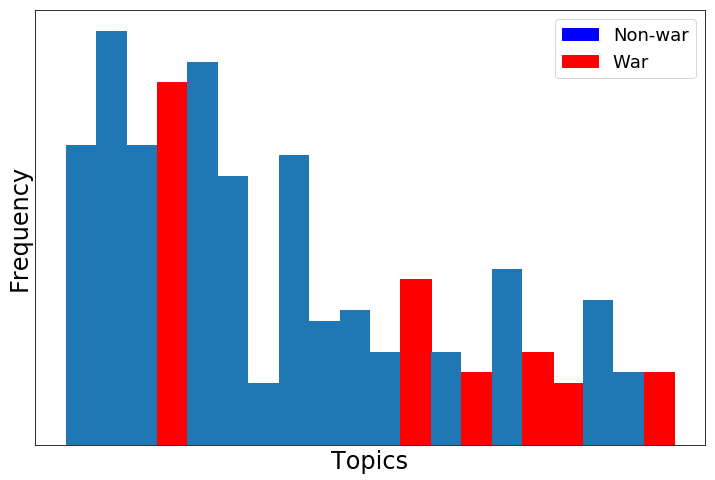

In [154]:
# plot topic histogram

fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(np.argmax(rand_var, axis=1), bins=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Topics', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)

top_clrs = [3, 11, 13, 15, 16, 19]
for clr in top_clrs:
    ax.get_children()[clr].set_color('r')
    
red_patch = mpatches.Patch(color='red', label='War')
blue_patch = mpatches.Patch(color='blue', label='Non-war')
plt.legend(handles=[blue_patch, red_patch], fontsize=18)
;
#savefig('hist_clr.png')


## Topic Exploration

In [126]:
# normalize topics so that they give a percentage of use in document

df_topics_norm.sort_values(by=0, axis=1, ascending=False).head()

,7,4,14,5,15,3,8,0,13,18,17,16,10,12,11,1,9,6,2,19
0,0.295016,0.239709,0.158455,0.119284,0.098187,0.067571,0.021779,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.089998,0.213419,0.592031,0.085916,0.018635,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.503103,0.376547,0.026059,0.047033,0.000000,0.012110,0.000000,0.0,0.011769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003864,0.004853,0.014661
3,0.000000,0.272546,0.624835,0.091318,0.011301,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.005362,0.267366,0.598987,0.020696,0.038662,0.000000,0.000000,0.068926,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [127]:
df_topics_norm.loc[0, :].sort_values(ascending=False)[:5]

7     0.295016
4     0.239709
14    0.158455
5     0.119284
15    0.098187
Name: 0, dtype: float64

In [131]:
# create list of top five topics and their percentages per speech

tot_top_list = []

for j in range(len(speech_df)):
    

    topic_num = df_topics_norm.loc[j, :].sort_values(ascending=False)[:5].index.values.tolist()
    topic_per = df_topics_norm.loc[j, :].sort_values(ascending=False)[:5].values.tolist()
    top_list = []

    for i in range(5):
        top_list.append(topic_num[i])
        top_list.append(round(topic_per[i] * 100))
        
    tot_top_list.append(top_list)
    

In [132]:
top_df = pd.DataFrame(tot_top_list, columns=['T1', 'T1%', 'T2', 'T2%', 'T3', 'T3%', 'T4', 'T4%', 'T5', 'T5%'])

In [133]:
speech_df2 = speech_df.reset_index()

In [134]:
# combine speech dataframe and top topics

speech_top_df = pd.concat([speech_df2, top_df], axis=1)

In [135]:
speech_top_df

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
0,1789 inauguration George Washington,inauguration,George Washington,1789,Fellow-Citizens of the Senate and of the House...,7,30,4,24,14,16,5,12,15,10
1,1790 state_union George Washington,state_union,George Washington,1790,I embrace with great satisfaction the opportun...,14,59,4,21,7,9,5,9,15,2
2,1790 state_union George Washington,state_union,George Washington,1790,In meeting you again I feel much satisfaction ...,4,50,14,38,15,5,5,3,19,1
3,1791 state_union George Washington,state_union,George Washington,1791,I meet you upon the present occasion with the ...,14,62,4,27,5,9,15,1,19,0
4,1792 state_union George Washington,state_union,George Washington,1792,It is some abatement of the satisfaction with ...,14,60,4,27,0,7,15,4,5,2
5,1793 state_union George Washington,state_union,George Washington,1793,Since the commencement of the term for which I...,4,35,14,29,15,10,5,9,0,5
6,1793 inauguration George Washington,inauguration,George Washington,1793,"Fellow Citizens:,I am again called upon by the...",15,87,7,13,19,0,8,0,1,0
7,1794 state_union George Washington,state_union,George Washington,1794,When we call to mind the gracious indulgence o...,4,23,14,22,7,22,16,12,5,9
8,1795 state_union George Washington,state_union,George Washington,1795,I trust I do not deceive myself when I indulge...,4,47,14,40,15,6,5,3,0,1
9,1796 state_union George Washington,state_union,George Washington,1796,In recurring to the internal situation of our ...,4,54,14,24,15,9,0,7,5,3


## Topic Exploration of state of union speeches during war years

In [152]:
# specify war years for retrieval

war_yr = ['1813', '1814', '1847', '1862', '1863', '1864',
          '1918', '1942', '1943', '1944', '1945', '1965', 
          '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
          '1991', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']

In [153]:
state_df.loc[state_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
32,1814 state_union James Madison,state_union,James Madison,1814,In meeting you at the present interesting conj...,16,84,4,11,14,5,19,0,8,0
74,1847 state_union James K. Polk,state_union,James K. Polk,1847,The annual meeting of Congress is always an in...,11,68,16,15,14,7,10,6,0,4
93,1862 state_union Abraham Lincoln,state_union,Abraham Lincoln,1862,Since your last annual assembling another year...,0,24,10,18,7,18,11,12,3,6
94,1863 state_union Abraham Lincoln,state_union,Abraham Lincoln,1863,Another year of health and of sufficiently abu...,0,42,14,13,7,12,15,11,16,9
96,1864 state_union Abraham Lincoln,state_union,Abraham Lincoln,1864,Again the blessings of health and abundant har...,0,36,10,19,16,14,7,10,14,5
171,1918 state_union Woodrow Wilson,state_union,Woodrow Wilson,1918,The year that has elapsed since I last stood b...,15,29,5,27,3,14,16,11,2,7
209,1942 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1942,In fulfilling my duty to report upon the State...,16,44,15,34,12,12,3,8,2,2
210,1943 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1943,"Mr. Vice President, Mr. Speaker, Members of th...",16,40,15,30,12,8,3,6,2,6
211,1944 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1944,"To the Congress:,This Nation in the past two y...",15,29,3,19,16,13,12,10,2,10
214,1945 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1945,"In considering the State of the Union, the war...",16,40,15,32,2,14,12,9,9,2


In [140]:
inaug_df = speech_top_df[speech_top_df['type'] == 'inauguration']

In [141]:
inaug_df.loc[inaug_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
31,1813 inauguration James Madison,inauguration,James Madison,1813,About to add the solemnity of an oath to the o...,16,84,14,8,7,6,3,1,4,1
215,1945 inauguration Franklin Delano Roosevelt,inauguration,Franklin Delano Roosevelt,1945,"Mr. Chief Justice, Mr. Vice President, my frie...",15,73,3,26,12,1,9,0,8,0
253,1965 inauguration Lyndon Baines Johnson,inauguration,Lyndon Baines Johnson,1965,"My fellow countrymen, on this occasion, the oa...",3,63,1,17,16,14,7,6,19,1
260,1969 inauguration Richard Nixon,inauguration,Richard Nixon,1969,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",3,63,1,29,15,7,19,1,8,0
330,2005 inauguration George W. Bush,inauguration,George W. Bush,2005,", Mr. Chief Justice, ,, ,, ,, reverend clergy,...",3,45,13,44,1,10,7,1,19,0


In [142]:
conv_df = speech_top_df[speech_top_df['type'] == 'convention']

In [143]:
conv_df.loc[conv_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
95,1864 convention Abraham Lincoln,convention,Abraham Lincoln,1864,"HON. WILLIAM DENNISON AND OTHERS, a Committee ...",8,59,11,41,19,0,1,0,2,0
212,1944 convention Franklin D. Roosevelt,convention,Franklin D. Roosevelt,1944,I have already indicated to you why I accept t...,15,55,3,14,2,14,8,9,9,4
213,1944 convention Thomas Dewey,convention,Thomas Dewey,1944,",I am profoundly moved by the trust you have ...",15,39,8,24,1,13,3,12,16,6
256,1968 convention Richard Nixon,convention,Richard Nixon,1968,Sixteen years ago I stood before this Conventi...,1,41,19,23,15,20,8,9,13,5
257,1968 convention Hubert H. Humphrey,convention,Hubert H. Humphrey,1968,This moment—this moment is one of personal pri...,1,30,19,27,3,18,8,13,15,13
328,2004 convention George W. Bush,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u...",13,53,1,21,9,12,12,11,8,3
329,2004 convention John F. Kerry,convention,John F. Kerry,2004,We are here tonight because we love our countr...,1,53,13,17,9,17,15,5,8,5


In [144]:
speech_top_df[speech_top_df['speaker'] == 'George W. Bush']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
321,2000 convention George W. Bush,convention,George W. Bush,2000,"Thank you. Thank you for this honor. [,],Thank...",1,31,9,20,3,13,8,11,12,11
323,2001 inauguration George W. Bush,inauguration,George W. Bush,2001,",, ,, ,, ,, distinguished guests and my fello...",3,36,13,32,1,25,7,3,14,3
324,2001 state_union George W. Bush,state_union,George W. Bush,2001,"Mr. Speaker, Mr. Vice President, Members of Co...",12,58,1,15,18,11,13,8,10,3
325,2002 state_union George W. Bush,state_union,George W. Bush,2002,"Thank you very much. Mr. Speaker, Vice Preside...",13,59,6,17,12,9,9,9,1,5
326,2003 state_union George W. Bush,state_union,George W. Bush,2003,"Mr. Speaker, Vice President Cheney, members of...",13,59,12,27,9,4,18,4,19,2
327,2004 state_union George W. Bush,state_union,George W. Bush,2004,"Mr. Speaker, Vice President Cheney, Members of...",13,57,12,33,1,7,5,2,19,0
328,2004 convention George W. Bush,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u...",13,53,1,21,9,12,12,11,8,3
330,2005 inauguration George W. Bush,inauguration,George W. Bush,2005,", Mr. Chief Justice, ,, ,, ,, reverend clergy,...",3,45,13,44,1,10,7,1,19,0
331,2005 state_union George W. Bush,state_union,George W. Bush,2005,"Mr. Speaker, Vice President Cheney, members of...",13,58,12,21,9,11,18,4,8,2
332,2006 state_union George W. Bush,state_union,George W. Bush,2006,"Mr. Speaker, Vice President Cheney, Members of...",13,51,1,14,12,13,18,8,2,4


In [145]:
speech_top_df[speech_top_df['speaker'] == 'Barack Obama']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
334,2008 convention Barack Obama,convention,Barack Obama,2008,"With profound gratitude and great humility, I ...",1,42,9,36,13,11,8,9,5,3
337,2009 inauguration Barack Obama,inauguration,Barack Obama,2009,"My fellow citizens:,I stand here today humbled...",3,53,1,32,16,9,13,5,4,2
339,2009 state_union Barack Obama,state_union,Barack Obama,2009,"Madame Speaker, Mr. Vice President, Members of...",12,31,1,29,9,16,10,13,18,4
340,2010 state_union Barack Obama,state_union,Barack Obama,2010,"Madam Speaker, Vice President Biden, members o...",6,82,9,7,1,5,5,2,12,2
341,2011 state_union Barack Obama,state_union,Barack Obama,2011,Tonight I want to begin by congratulating the ...,1,41,9,29,12,17,5,11,6,1
342,2012 convention Barack Obama,convention,Barack Obama,2012,Thank you. Thank you. Thank you. Thank you so...,9,52,1,31,12,8,8,4,13,3
343,2012 state_union Barack Obama,state_union,Barack Obama,2012,"Thank you, thank you. Everybody, please be sea...",9,40,1,30,12,14,5,8,10,5
345,2013 state_union Barack Obama,state_union,Barack Obama,2013,", ,, ,, fellow citizens: ,, , declared to this...",1,39,12,28,9,20,5,8,13,3
346,2013 inauguration Barack Obama,inauguration,Barack Obama,2013,",, Mr. ,, ,, distinguished guests, and fellow...",3,49,1,30,13,15,7,3,16,2
347,2014 state_union Barack Obama,state_union,Barack Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",1,39,9,24,12,22,13,7,5,6


In [206]:
speech_top_df[speech_top_df['speaker'] == 'Donald J. Trump']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
351,2016 convention Donald J. Trump,convention,Donald J. Trump,2016,"U.S.A.! U.S.A.! U.S.A.!,Together, we will lead...",1,42,13,17,19,10,5,8,9,7
352,2017 state_union Donald J. Trump,state_union,Donald J. Trump,2017,"Mr. Speaker, Mr. Vice President, Members of Co...",1,33,6,17,13,12,9,11,12,7
354,2017 inauguration Donald J. Trump,inauguration,Donald J. Trump,2017,",, ,, ,, ,, ,, fellow Americans, and people o...",1,51,15,21,13,15,3,8,9,5
355,2018 state_union Donald J. Trump,state_union,Donald J. Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",1,35,13,24,19,18,12,10,16,6


## TSNE
Plot topic clusters and label them

In [75]:
# NMF fit-transform on TFIDF matrix
# output is weights matrix of # docs x # topics

doc_top = nmf.fit_transform(t_counts)

In [76]:
doc_top.shape

(356, 20)

In [77]:
# output is vector of highest weighted topic for each document
# length is # docs

doc_max_top = np.argmax(doc_top, axis=1)

In [78]:
doc_max_top.shape

(356,)

In [79]:
# TSNE fit-transform on weights matrix
# output is coordinate matrix of # docs x 2

from sklearn.manifold import TSNE

doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(doc_top)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.000s...
[t-SNE] Computed neighbors for 356 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.315894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.453484
[t-SNE] Error after 1000 iterations: 0.389993


In [80]:
doc_plot

array([[ -8.387486  ,  16.015284  ],
       [-11.908947  ,  19.026947  ],
       [-11.162198  ,  21.380974  ],
       [-11.67337   ,  19.45233   ],
       [-12.119651  ,  19.677212  ],
       [-11.284419  ,  21.02223   ],
       [ -2.0888934 ,  -9.0169115 ],
       [ -9.595501  ,  17.676361  ],
       [-11.117333  ,  21.685816  ],
       [-10.639583  ,  22.835358  ],
       [ -7.9678206 ,  15.420524  ],
       [-11.027747  ,  24.85884   ],
       [ -8.162177  ,  14.569175  ],
       [-10.714951  ,  24.743294  ],
       [ -9.368259  ,  24.406143  ],
       [-10.816471  ,  24.297861  ],
       [ -7.4158354 ,  13.929151  ],
       [-10.279383  ,  23.462702  ],
       [ -9.806018  ,  24.03321   ],
       [-10.104298  ,  24.396507  ],
       [ -9.648397  ,  24.937067  ],
       [ -9.086963  ,  25.079863  ],
       [ -8.006598  ,  14.723761  ],
       [ -8.686325  ,  24.1454    ],
       [ -8.339695  ,  24.40431   ],
       [-10.037625  ,  24.932192  ],
       [ -7.911753  ,  16.28906   ],
 

In [81]:
doc_plot.shape

(356, 2)

Text(0.5,1,'tsne with max topic labels')

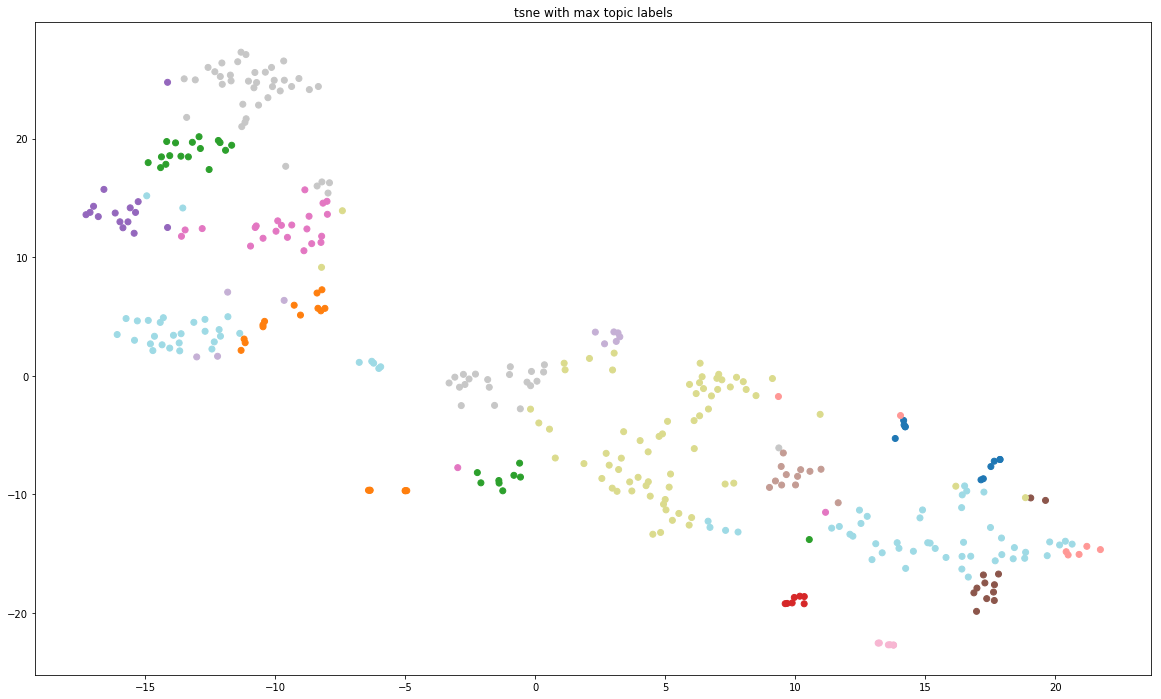

In [82]:
plt.figure(figsize=(20,12))
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top, alpha=1, cmap=plt.cm.get_cmap('tab20_r', 30))
plt.title("tsne with max topic labels")


In [83]:
doc_max_top

array([ 4, 14,  4, 14, 14,  4, 15,  4,  4,  4,  4,  4,  7,  4,  4,  4,  3,
        4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  4, 16, 16, 16, 14,
        4,  4,  4,  4, 11,  4,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4, 14,
        7, 14,  4, 14,  7,  4, 14, 14, 14,  7, 14, 14, 14, 14, 14,  7, 14,
       14, 11, 11, 11,  7, 11, 11, 11, 11,  7, 11, 11, 11,  0,  7,  0, 11,
        7,  7, 11, 11, 11,  7,  0,  7,  0,  0,  8,  0, 15,  7,  7,  7, 10,
        0,  7,  0,  0,  0,  0,  3,  0,  0,  0,  7, 10,  0,  0,  0,  7,  0,
        7,  0,  0,  0,  0,  7,  0, 10, 17,  0,  7,  0,  0, 17, 17, 17,  0,
        5, 10, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5,  0,  5,  3,  5,
        5,  5,  5,  5,  5,  0,  0,  0,  0,  3,  5,  3,  3,  3,  3,  5, 15,
        3, 15,  5, 10,  3,  5,  3,  5,  5,  5,  5,  5,  5,  5,  2,  2,  8,
        2,  3, 10, 10, 10,  8,  8, 10,  3, 10,  2,  3,  3,  3,  3,  2,  2,
        3,  2,  8,  3,  3, 16, 16, 15, 15, 15, 16, 15,  2,  2,  3,  8,  2,
        3,  2,  2,  2,  2

In [84]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [195]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 20))

    # We create a scatter plot.
    f = plt.figure(figsize=(20, 12), facecolor='#fbeeac')
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(20):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

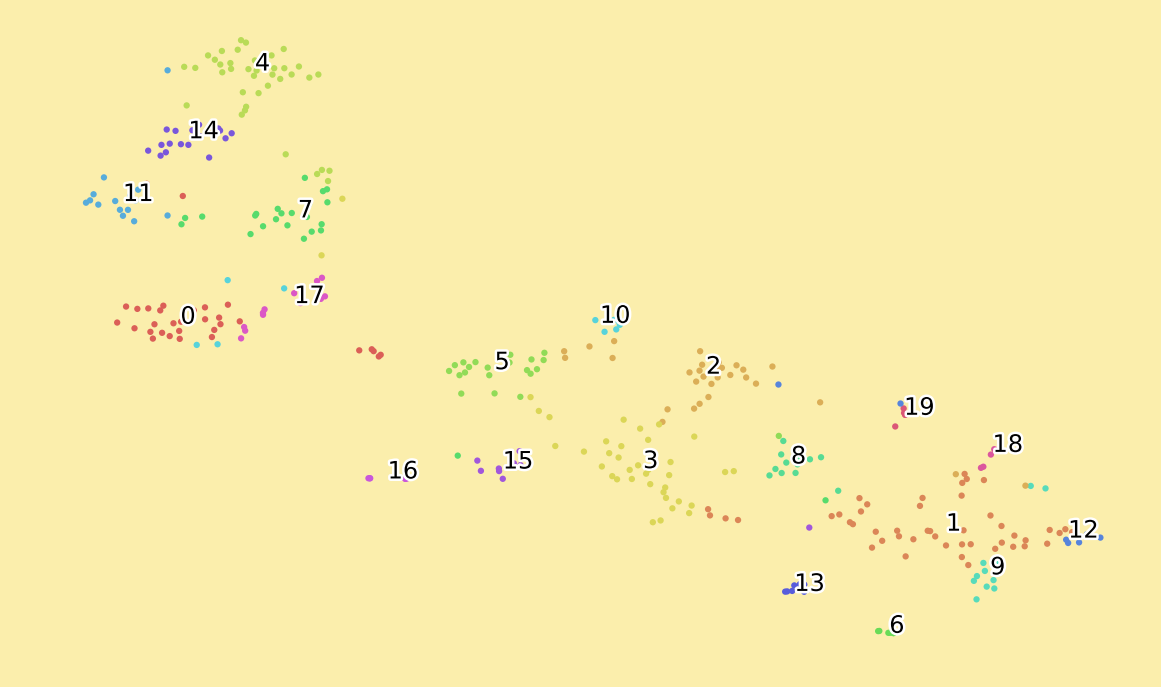

In [197]:
scatter(doc_plot, doc_max_top);
savefig('TSNE.png')